<a href="https://colab.research.google.com/github/bernardo9830/MachineLearning-DL/blob/main/Machine_Learning_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNIGN AND DEEP LEARNING
An overview of pratical and mathematical aspects of these disciplines.
We're following different books and papers. Finally we're working about different kaggle projects and discover every mathematical aspect.



In [ ]:
import sys
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## Perceptron Model ##



The idea of perceptron model is motivated by the *Warren McCullock* and *Walter
Pitts* about the works on brain cell as logic gate with output $0$ or $1$. In general the brain cell is a neuron that receives chemical and electrical signals and processes these. There are some dentrities that transport information to the body of the neuron and neurons are interconetted wich other by the axons. When the signals execed an certain **threshold** then neurons fire or not.

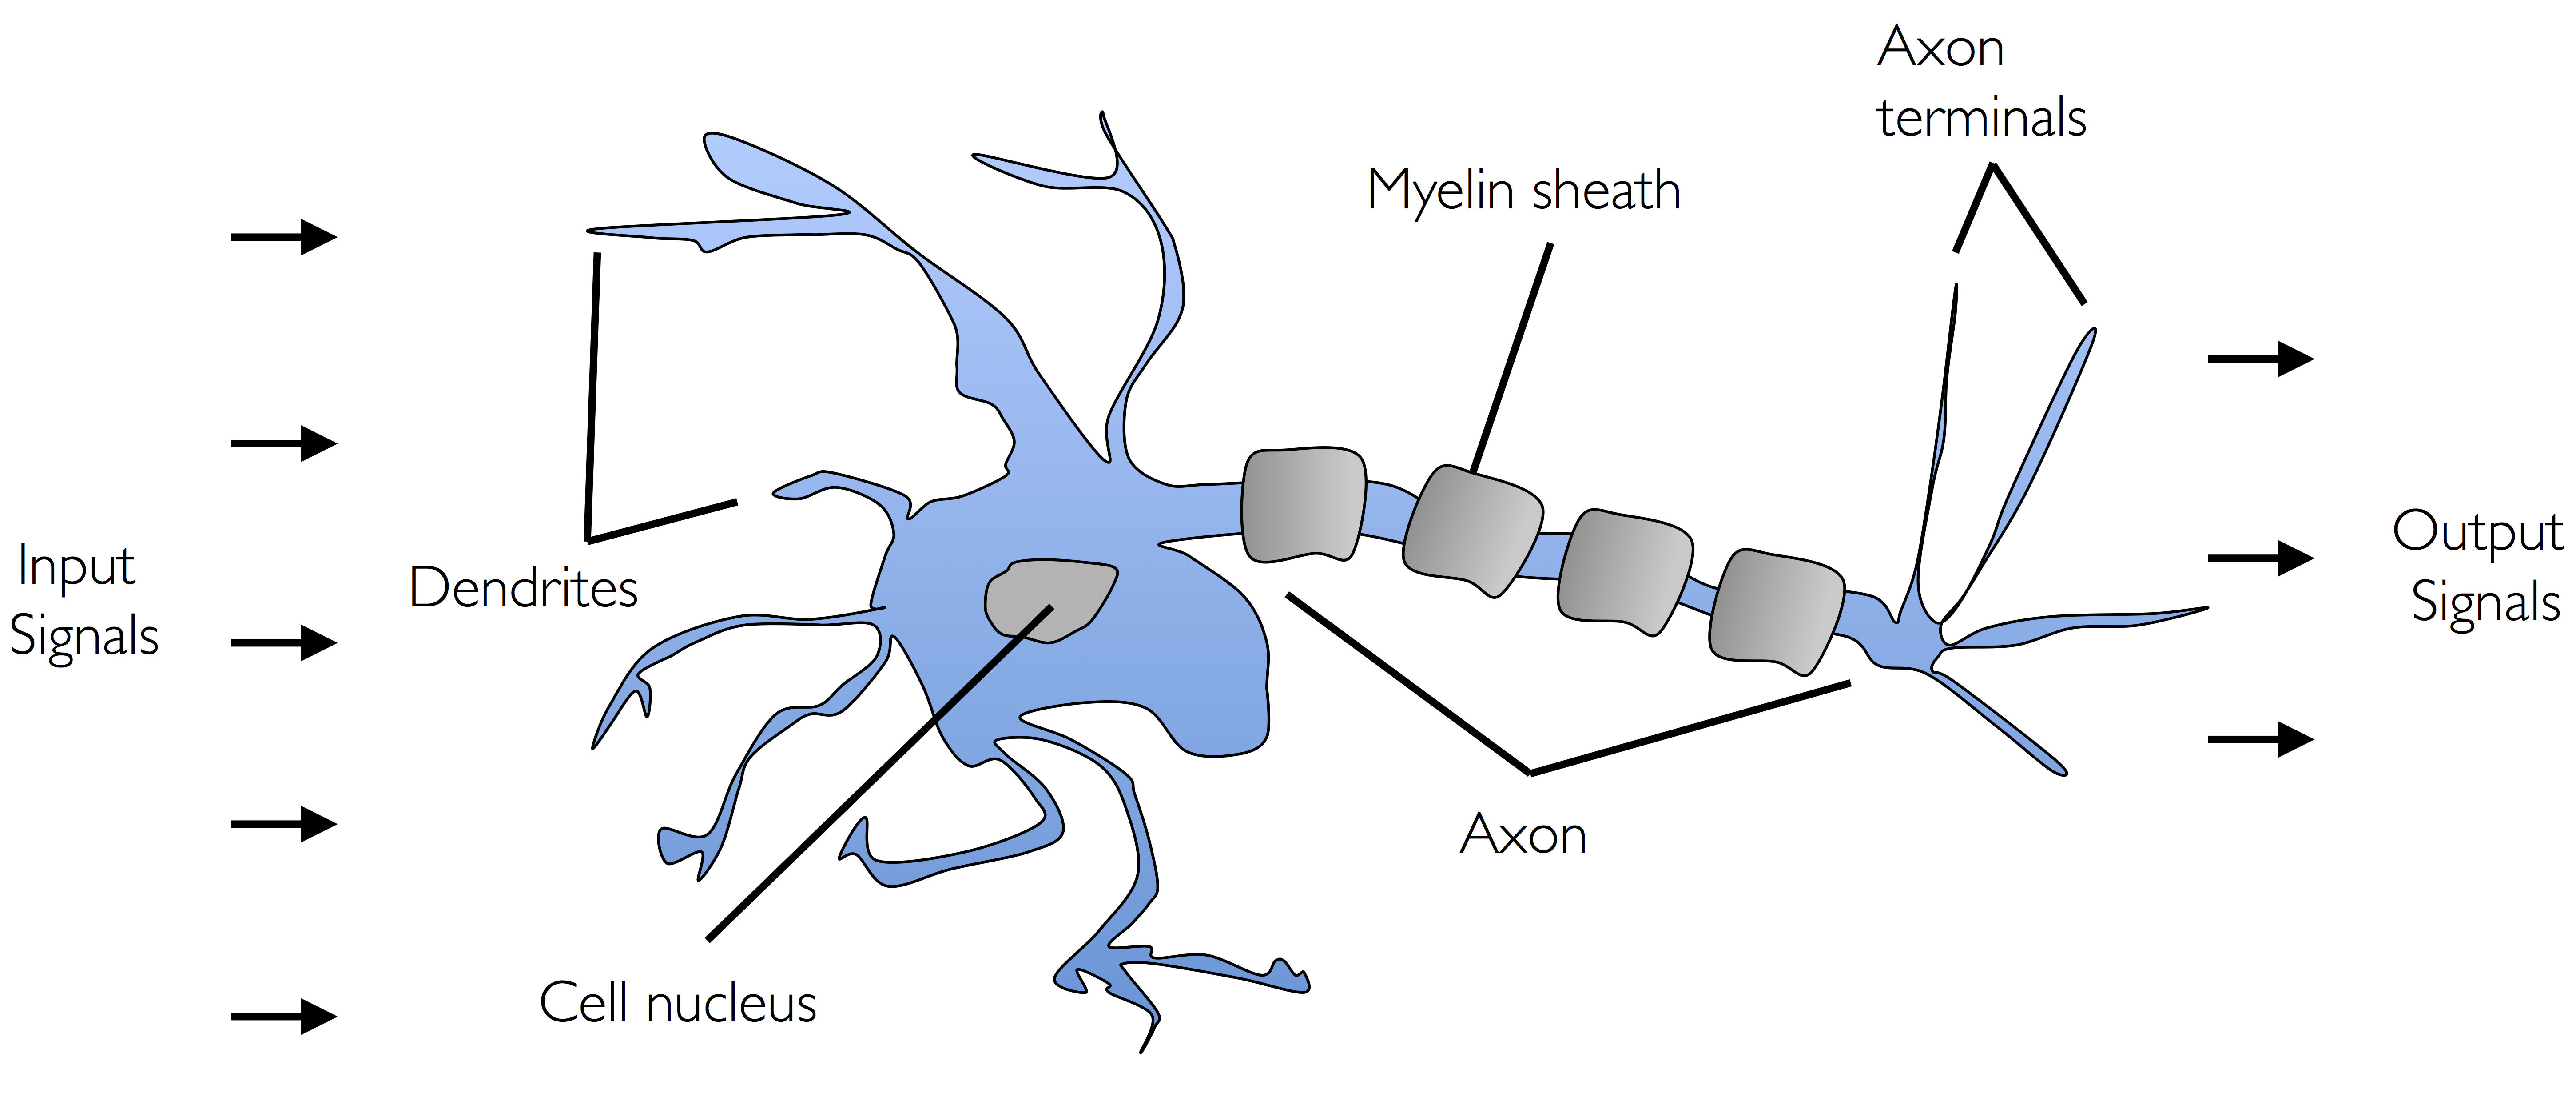

In [ ]:
from IPython.display import Image
Image(filename='./02_01.png', width=500)

# Formal Definition of Perceptron #

Rosenblatt pubblished a learning rule based on the MCP neuron model (The Perceptron: A Perceiving and
Recognizing Automaton, ) With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal coefficients weights that are multiplied by the features vector, to predict if a sample belongs to one class or the other.

The problem that we can risolve is a **Classification problem**.

The classification problem in machine learning is an important task. Given a *labeled* dataset (that is a dataset with a features vectors and the respective label classes) $D \in \mathbb{R}^{n} \times \mathcal{C}$ where $\mathcal{C}$ is the set of the classes we want to approximate very well the unknown function:
$f: Π_{1}(D) \to \mathcal{C}$ such that $f(x^{i}) = y^{i}$.

Some observations:


*   $Π_{1}(D)$ is the imagine of the projection map on the first component. So it is the set of the samples.
*   Approximate in this case is a little fuorviant, because we don't know exactly the relation about labels and features. We so want construct a classifier $h(x)$ that performs well on the data points and about the classification of unseen data points(*test set*, we'll discuss the pipeline of a machine learning problem in the latter sections).
* How choose this **classifiers**? The classifiers in general is called hypothesis, because we want navigate the **Hypothesis space** to determine a well classifiers. Hypothesis space is a parametrization of class of functions,
$H(\theta) := \{h_{\theta}(\cdot) \ | \ \theta \in \mathbb{R}^{n+1} \}$
* The goal is optimize a fixed *cost function* to find the optimal parameters $\bar{\theta} \in \Theta \subset \mathbb{R}^{n+1}$ that fit data points.

A mathematical formulation it'll be given in the appendix of this section.





Suppose now to work with 2-dimensional Dateset for a binary classification problem that is $\mathcal{C} = \{-1,1\}$. A perceptron model maps a linear transformation of the features vector with some coefficients $T_{w}(x)=w^{T}x= w_{1}x_{1}+ \dots + w_{n}x_{n} = z$. The output of this functions is called net input. Then we have a decision function to decide the classification outputs:
$\delta(z)=
\begin{cases}
0 & \text{if} \ z \geq \theta \\
1 & \text{if} \ z < 0
\end{cases}
$

In this case $\theta$ is a treshold.

In a simple way we can introduce an auxiliar features $x_0=1$ and $w_0=-\theta$ to obtain the compact formula:

$\delta(z)=
\begin{cases}
1 & \text{if} \ z \geq 0 \\
-1 & \text{if} \ z < 0
\end{cases}
$

The value $-\theta$ is called *bias*.




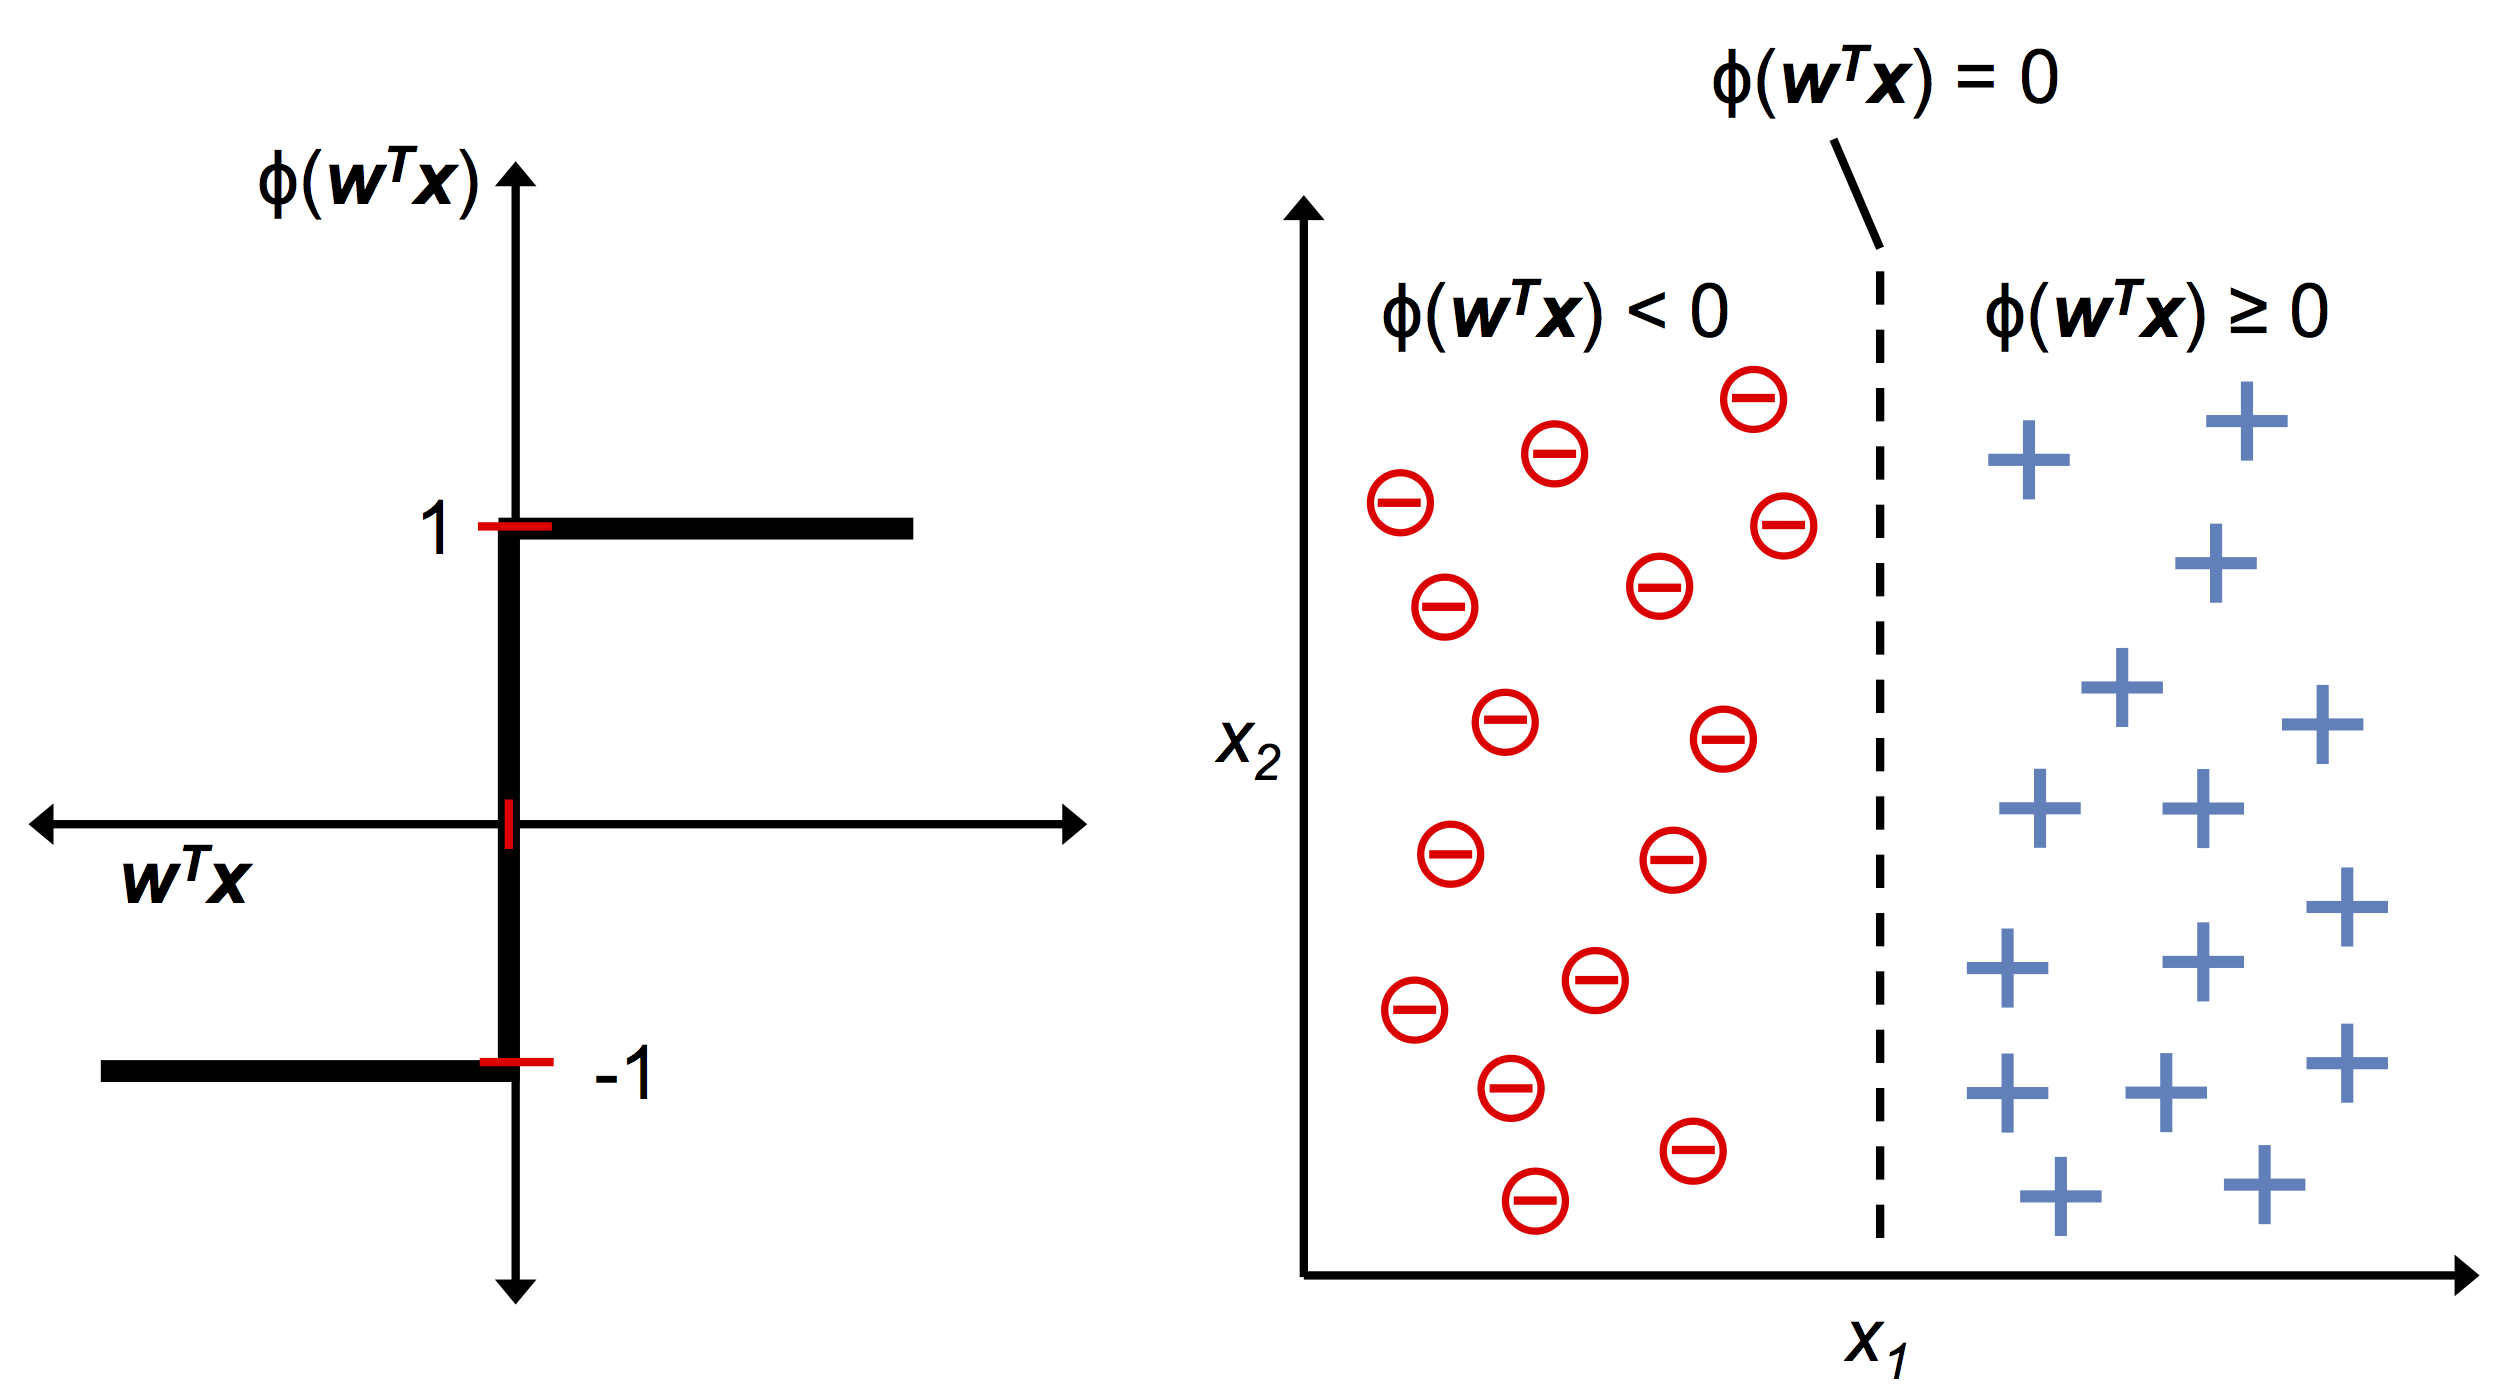

In [ ]:
Image(filename='./02_02.png', width=500)

#Perceptron training rule#

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain
works: it either *fires* or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps:


*   Initialize a small random vector of weights $w$
*   For every **training example** $x^{(i)}$
    *   Calculate the output prediction $\hat{y}^{(i)}$
    *   Update the weights

It's important to observe that we ricalculate the successive output prediction only after the weights are all updates or simultaneous.

The update rule is:
$$w_{j}=w_{j}+Δw_{j}$$

Note:


*   $Δw_{j} := η(y_j-\hat{y}_{j})x_{j}$
*   $\eta$ is the learning rate. It is the step size of the learning process and it controls how aggressive is the learning rate.
* Infact we can prove that the convergence of this model is given only by linear separable classes of training examples and a sufficient learning rate. In this case we can find a decision surface tha separate the training examples.








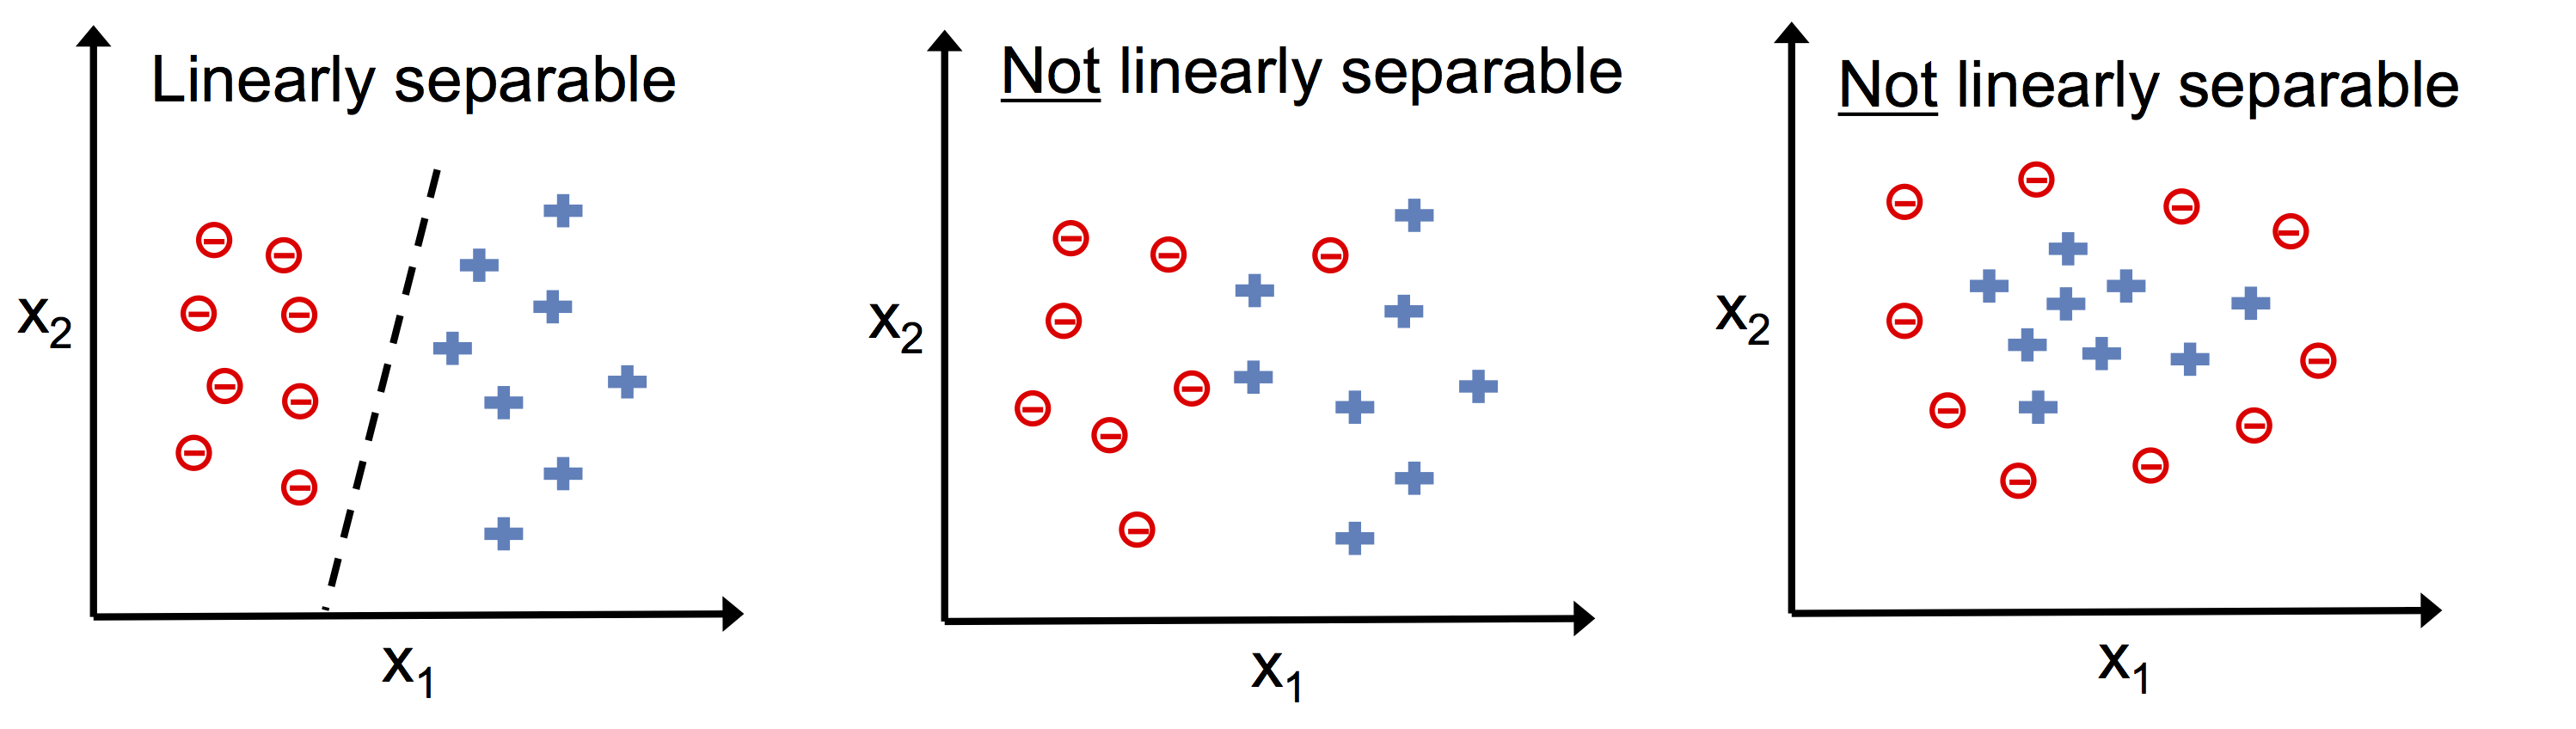

In [ ]:
Image(filename='./02_03.png', width=600)

Now we propose an example for visualize the role of $\eta$.
If we misclassify a sample $x$ with positive class then:
$$w_{j}=w_{j}+\eta(-1-1)x_j = w_j-2 \eta x_j$$

Now fixed $x_j$ we want reduce the value of $w_j$ since $z$ to be under the treshold.


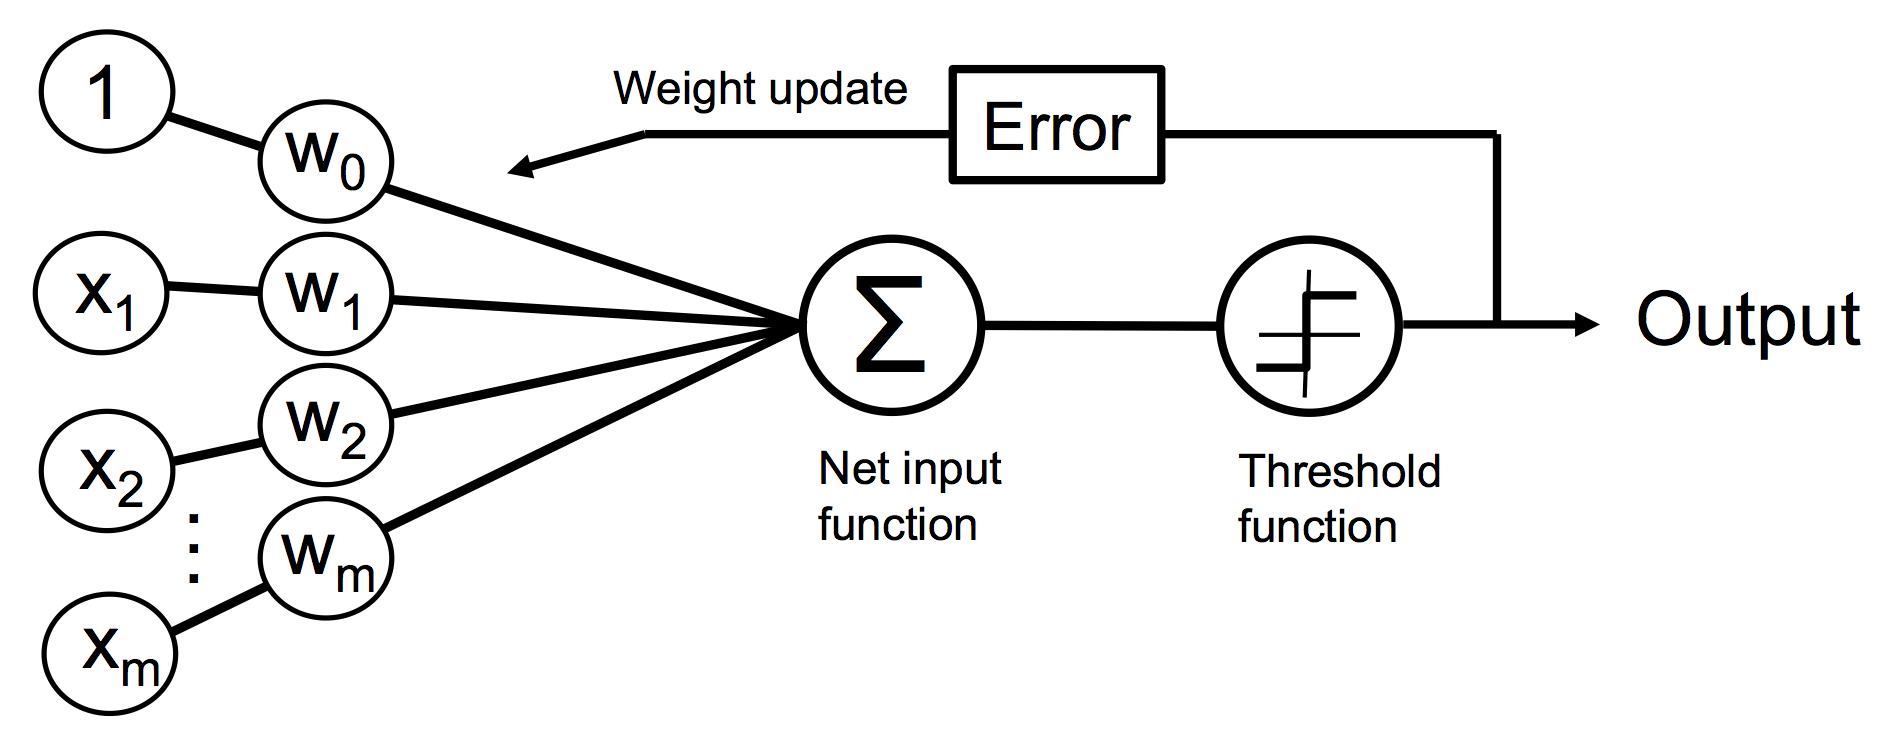

In [ ]:
Image(filename='./02_04.png', width=500)

Programming a perceptron class

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """

    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for i in range(X.shape[0]):
                dw = self.eta * (y[i] - self.predict(X[i])) * X[i]
                self.w_[1:] += dw
                self.w_[0] += self.eta * (y[i] - self.predict(X[i]))
                errors += int(dw.any())
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



##Training perceptron model on Iris Dataset##
In this example we choose only two features of tha samples and we build a binary classifier. The reason is only pratical, because it's more simple to visualize the work on a two dimensional features subspace. Another observation is that we can use a techinique called **One VS Rest** to build a multilabel classifier. Indeed we can train a binary classifier on a training set with a specified label(the significant label for the classifier) and set -1 or 0 as label for other samples wich belong other class. In this way we build $n$-classifier (where $n$ is the number of the classes) and when predict a future sample we'll choose the label with the highest confidence given by the classifiers.

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


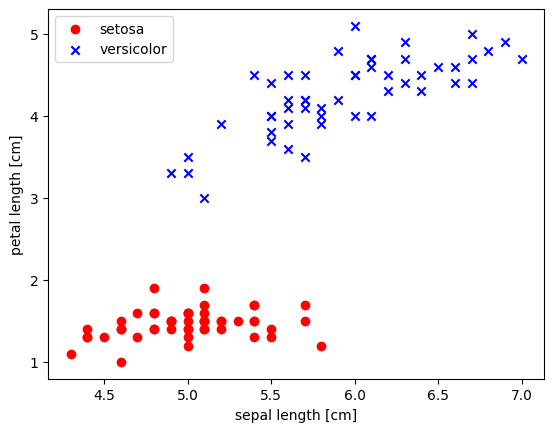

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

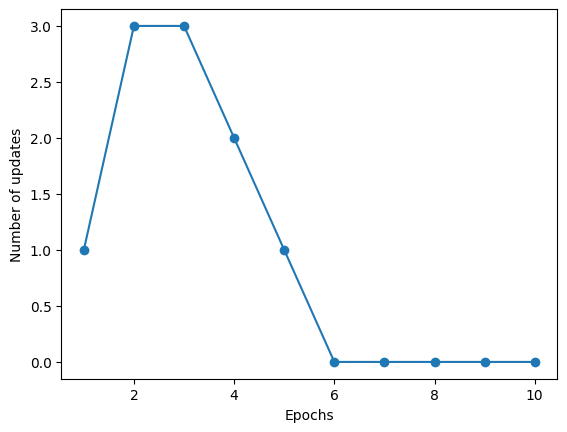

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

##Convergence of perceptron##

**Theorem**(Convergence of perceptron):
Let $\mathcal{D} = \{(x_{i},y_{i})\}_{i \in \mathbb{N}}$ a dataset with label $y_{i} \in \{0,1\}$. Suppose the dataset is linearly separable, that is exists an hyperplane that separates the two classes. Suppose, hence there is a some unit vector $w^{*}$ that the margine is $σ:=\text{min}_{(x,y) \in \mathcal{D}} \ y(w^{*} \cdot x) $. Then the perceptron algorithm converges after at most $N \geq \frac{R^{2}}{\sigma^{2}}$.

**Proof**:

Let $\text{max}_{x \in Π_{1}(\mathcal{D})} \  ||x||^{2} := R^{2}$ then suppose the perceptron makes a mistake with true class $y=1$:

$w^{n+1} = w^{n} + \eta(1-(-1))x = w^{n} + 2ηx $.

Then we evaluate:

$||w^{n+1}||^{2} - ||w^{n}||^{2} = 4\eta^{2}||x||^{2}+4\eta w^{n}\cdot x \leq 4\eta^{2}R^{2}$

Because $w^{n}\cdot x < 0$ since the perceptron make an error.

Then we obtain $||w^{n+1}||^{2} < ||w^{n}||^{2}+ 4\eta^{2}R^{2}$ and since we started with $w^{0} = 0$ we obtain $||w^{N}||^{2} \leq 4N\eta^{2}R^{2}$.

Now we have for Cauchy Schawrtz disequality $||w|| \ ||w^{*}|| \geq |w \cdot w^{*}|$ then we obtain $||w||^{2} \geq (w \cdot w^{*})^{2}$. Then for $N$ we obtain:
$w^{N} \cdot w^{*} =w^{N-1} \cdot w^{*} +2\eta w^{*}x \geq2\eta\sigma$.
Finally we obtain:

$||w^{N}||^{2} \geq 4N^{2}\eta^{2}\sigma^{2}$.

Now we can combinated the two inequalities and we obtain $N \leq (\frac{R}{\sigma})^{2}$. Note that we obtain convergence because after $N$ steps the vector weights $w$ it's similiar by cosine to $w^{*}$:

$1\geq \frac{w^{n} \cdot w^{*}}{||w^{n}||} \geq \frac{2N\eta\sigma}{2\sqrt{N} \eta R}= \sqrt{N}\frac{\sigma}{R}$


In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-29-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


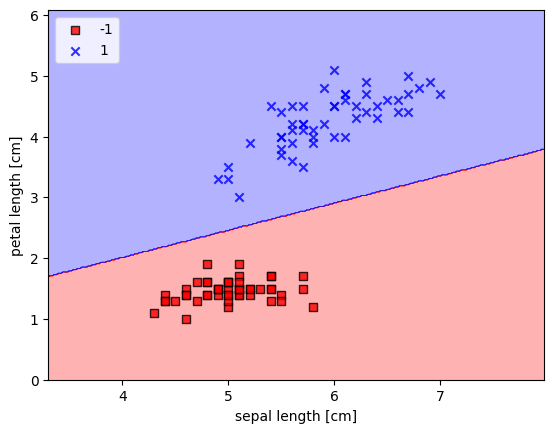

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

##ADA##
Now we'll discuss a different type of artificial neuron model **Adaptive Linear Neuron**.
In this case the key difference beetwen perceptron is putting an activation function to update the weights. Infact instead to update the weights incrementally after evaluate the predicted class labels with true labels, we'll calculate the sum of errors given by activation functions and update weights. The process is called **batch gradient**.

First of all we define and activation function as $\phi(z)=z=w^{T}x$. Then we must define an **cost function** $J(w;x)$ to minimize. In this case we take the *mean square error* $MSE(w)=-\frac{1}{2}\sum_{i=1}^{n}(y^{(i)}-\phi(z^{(i)}))^{2}$.
The principal advantage is that the cost function is differentiable, then it's convex. This is important because we'll utilize a **gradient descedent** to update the weights.

The gradient descedent works as following: we'll calculate the gradient of the cost function and take the opposite direction of the gradient because is the steepest descedent direction. Then we expected that the algorithm converges to a local minimum or global minimum.

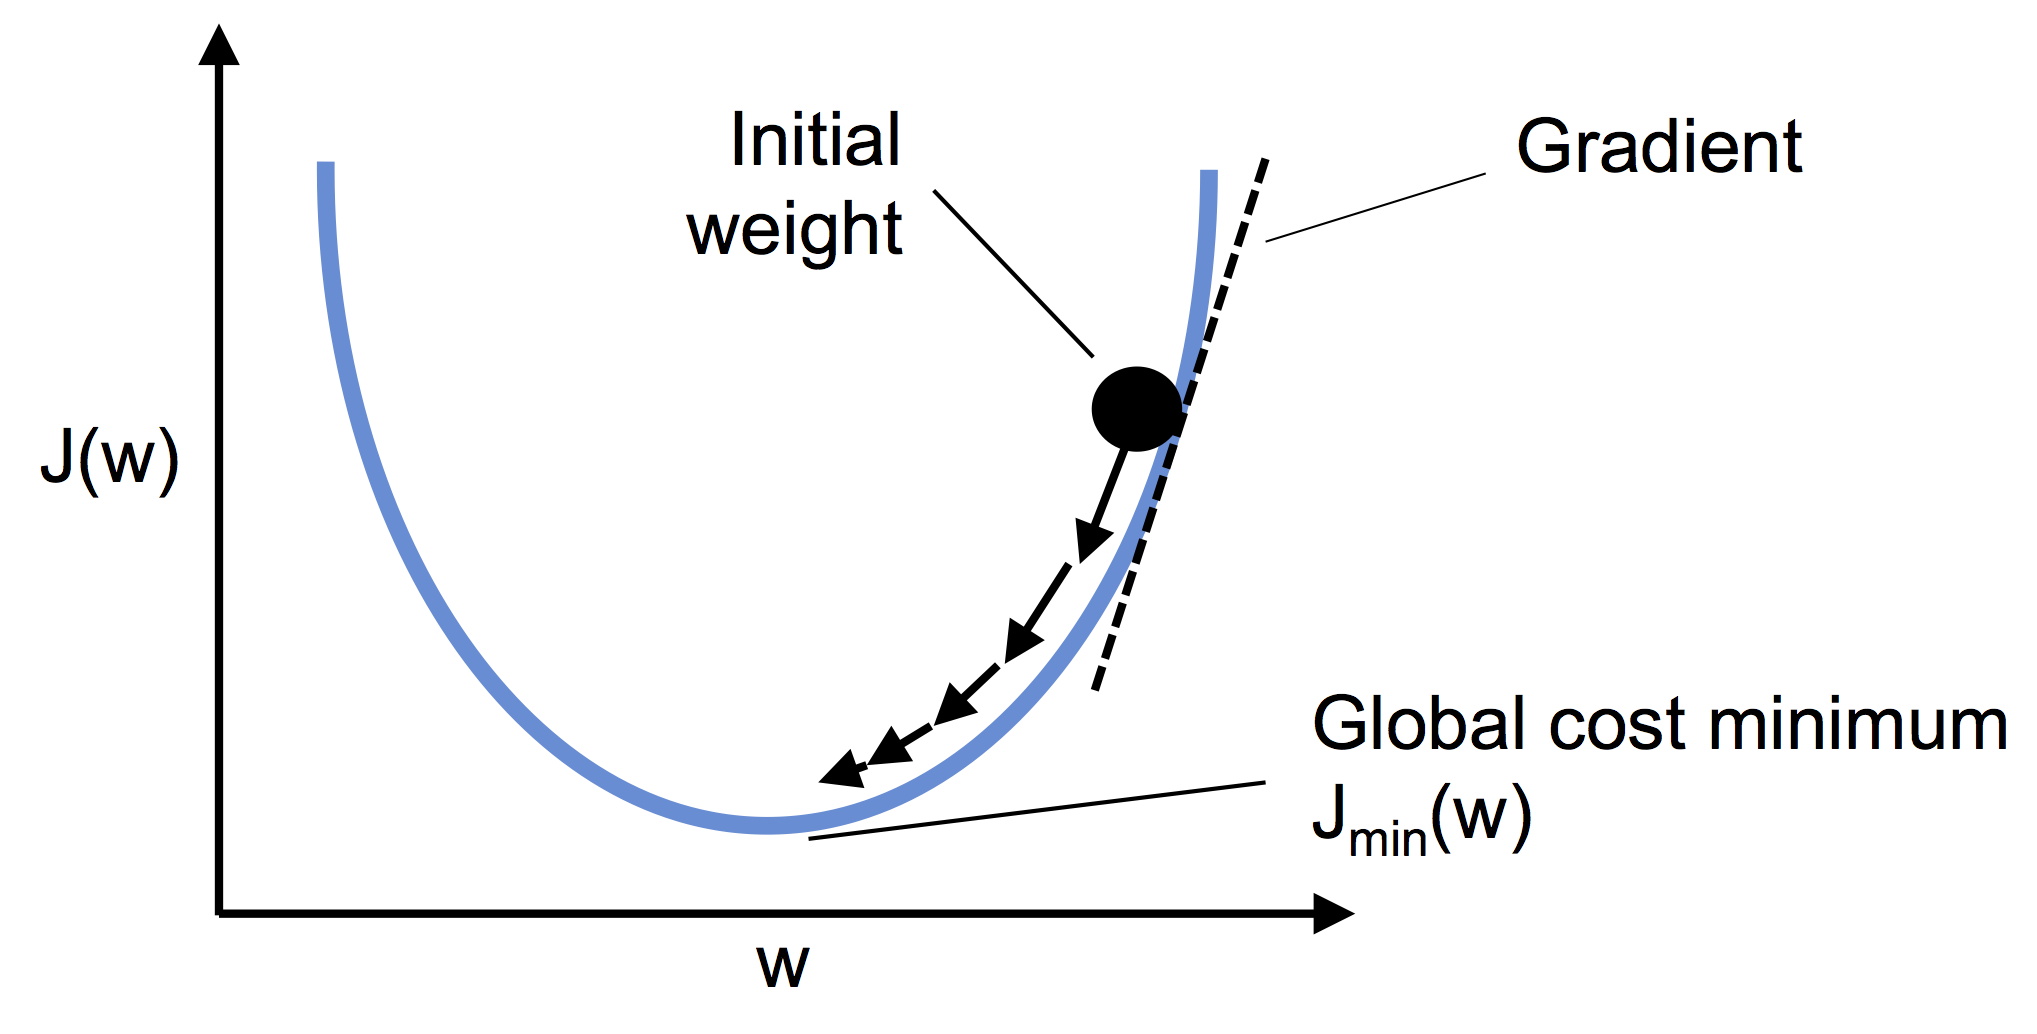

In [ ]:
from IPython.display import Image
Image(filename='./02_10.png', width=500)

The training rule for a weights vector is:

$w := w +dw$ and $dw=-\eta ∇_{w}J(w)$
Now projecting on every components $j=1 \dots m$ the dimension of a features subspace, and for a fixed training example $i$ we'll have:

$\frac{δJ}{δw_{j}}(w)=-(y-\phi(z^{i}))x^{i}_{j}$ and then:

$w^{i}_{j}= w^{i}_{j} + \eta(y^{(i)}-\phi(z^{(i)}))x^{(i)}_{j}$

In general without fixed a training example we'll obtain:
$w_{j} = w_{j} + \eta \sum_{i=1}^{n}(y^{(i)}-\phi(z^{(i)}))x^{(i)}_{j}$

**Problems of convergence of gradient descedent**
The step size is determinated by $\eta$. This **hyperparameter** regualates the aggressivity of minumum research. If we set a large value of $\eta$ we may not go on a minimum because we may *overshoot* the minimum. If we set a very small learning rate we may go on minumum very slowly. Another problem is the cost function form. Minimizing a convex function is simpler problem than minimizing a non convex function. For a convex optimization there are a suitable conditions for wich we'll take the convergence. Another problem is if the function has got a lot local minimum. We'll discuss it in the appendix.

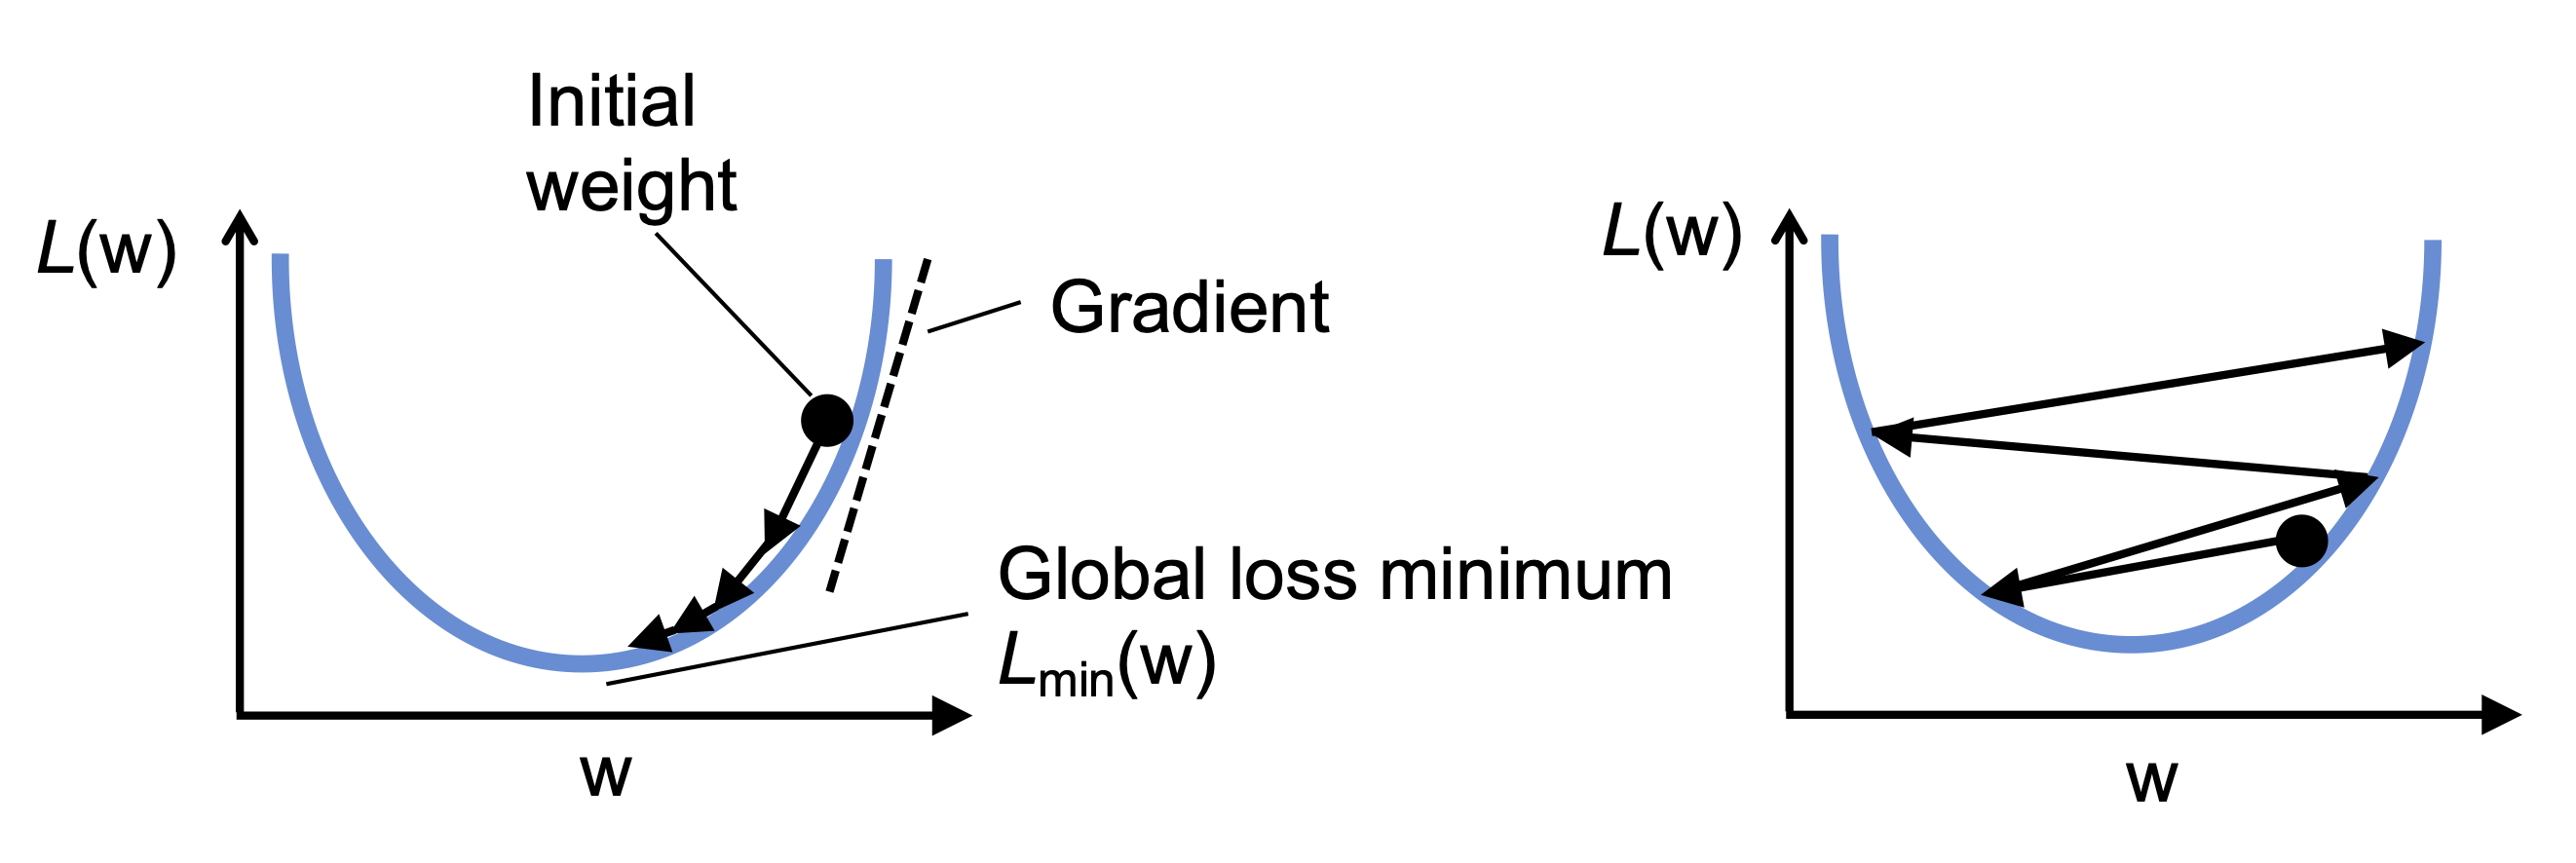

In [ ]:
from IPython.display import Image
Image(filename='./02_12.png', width=500)

In [ ]:
import numpy as np

class ADA(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost : list
      sum of squares cost function value for each epoch.
    """

    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost = []

        for i in range(self.n_iter):
          net_input = self.net_input(X)
          output = self.activation(net_input)
          errors = y-output
          self.w[1:] += self.eta*X.T.dot(errors)
          self.w[0] += self.eta * (errors.sum())
          cost = (errors**2).sum() / 2.0
          self.cost.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    def activation(self,X):
      return X

    def predict(self,X):
      return np.where(self.activation(self.net_input(X))>=0, 1,-1)



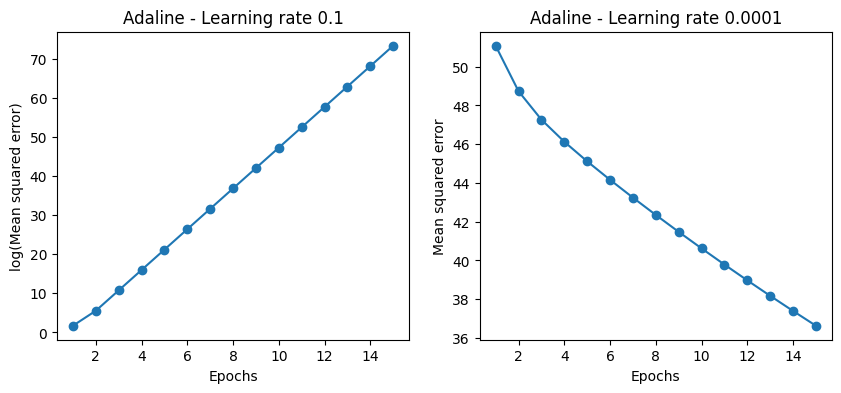

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = ADA(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost) + 1), np.log10(ada1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = ADA(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost) + 1), ada2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

**Stochastich Gradient descedent**

Instead to update the weights after evaluate the cost function over the whole training set, we calculate the average cost function for each training example and update the weights. It's more convenient for different reasones:



*   Evaluate for each epoch the cost function for the whole training set may be very expansive if we'are working with large amounts of data, that is not a surprise in machine learning project
*   Since we have more updates than batch gradient descedent we can go on convergence more fast than gradient descedent.
* The stochastic gradient discedent is an approximation of gradient descedent and since the update is made on single training example, the error surface is noiser than gradient descedent and we have the advantage to jump the local minimum

So we update the weights incrementally:

$dw=\eta(y^{i}-\phi(z^{i}))x^{i}, \ \ w:=w+dw$

To obtain
satisfying results via stochastic gradient descent, it is important to present it training prevent cycles. A compromess beetween *batch gradient* and *stochastich gradient* is a **mini batch gradient descedent**. We use a random small subsets of training data called **batch** to update weights. The rule is as follow:
* Take a random subsets $\{x_{i},y_{i}\}_{i=1 \dots k} \subset \mathcal{D}$
* Calculate the cost function given by this subset.
* Update the weights

Another important question, it's that stochastic gradient descedent is importnat for **online learning**. In online learning we're working with a flow continuos of data, and SDG may give to the model the ability to change adaptive as new data arrive. So we can discard the older training examples and use a new data points as training set.


**Adaptive learning rate**.

It's important to use an adaptive learning rate given by monotoring the behavior of the training step. For example we can use $\eta(epoch,c_1,c_2) = \frac{c_1}{\text{number of iterations}+c_2}$. This learning rate decreases over the time. It may be important, because if at fixed epoch we are close to the minimum, we would reduce at next iterations the step size to prevent overshotting the local/global minimu.



In [ ]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta *  xi * (error)
        self.b_ += self.eta *  error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

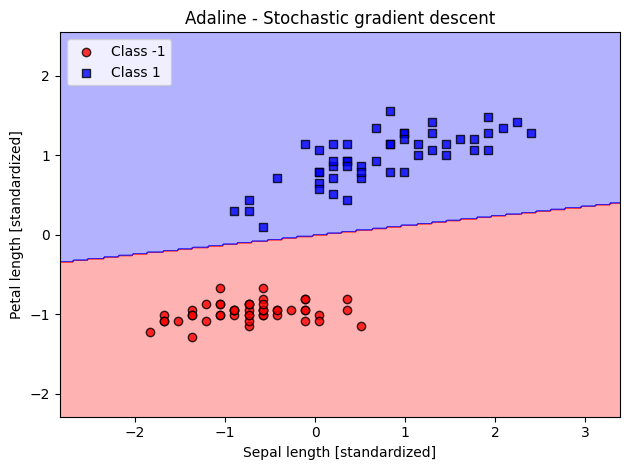

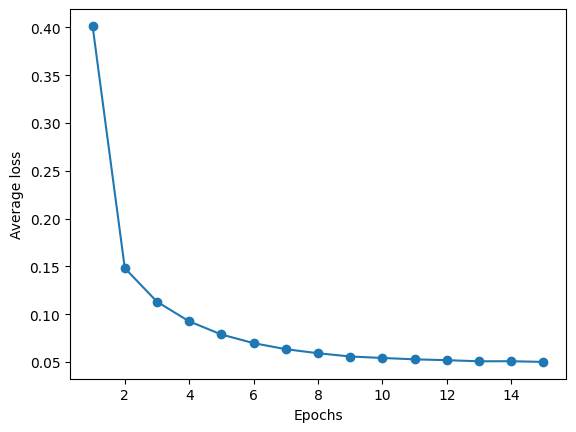

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

**SCIKIT-LEARN**

Scikit learn is an importan machine learning library wich provides different machine learning library and implemented function for *feature scaling*.

In a classification problem we choose a different classification algorithms that depends on the problem. There are five main step that are involved in training step of a model:

* Collect a data samples and create a training set
* Choosing a performance metric
* Choosing a classifier
* Evaluating the performance of the model
* Tuning the algorithm

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

The function *train_test_split* provides arrays as X_train etc.. to split dataset in training data and test set. The function shuffle the dataset before splitting, otherwise, all class 0 and class 1 samples would have
ended up in the training set, and the test set would consist of 45 samples from
class 2.

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


The parameter *stratify=y* implies that training data and test set has the same proportion of class labels.


An important method by scikit-learn is Standerscaler() that gives the normalized features:
$$x_{i} = \frac{x_{i}-\mu}{σ}$$

where $x_{i}$ is the feauters, $\mu$ the sample mean of the observation of the given features, while $\sigma$ is the sample standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

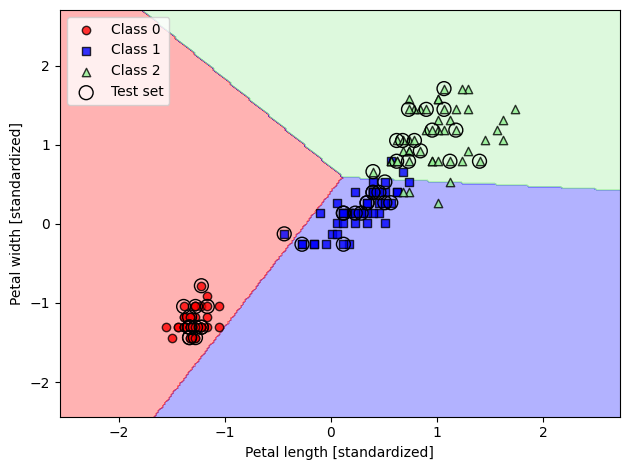

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

##Appendix##



**Mathematical Formulation of Machine Learning**

Machine learning is the field of study that involves the processing of information to gain insights for make predictions. The goal of machine learning is *learning* that is related to the process of information elaboration to perform different task.

In my opinion best definition of learning process is given by Tom Mitchell in the book Machine Learning:

Machine learning is the study of the learning ability of machines. For learning we'll refer to a task $T$, and we'll say a machine learns respect the experience $E$ and a measure perfomance $P$ if the performance $P$ evaluate on the task $T$ increases as improving the experience $E$.

**Different types of machine learning**

- Supervised Learning: In the task of supervised Learning we're working with **labelled training data**. So we have the tuples $(x,y)$ where $y$ is the label or solutions of data $x$. We feed this set in the training step and the objective is labelling an unseen record.
The principal algorithms are **classification** or **regression**.

- Unsupervised Learning: We feed in the training process an **unlabelled data** and we would obtain insights and pattern beetween data. An example is **Clustering**. It is a powerful algorithm and it can be used for create groups of clients with similiar preferences (for example in the task of Netflix or streaming company to suggest products or to discover the behavior of a certain population based on different features.)

- Semi-Surpevised Learning: We're working with labelled and unlabelled data. It's very useful when collect labelled training data is more expensive. For example some task of NLP arise in the domain of semi-surpevised learning.

**Setting the formulation problema of supervised learning**

In a supervised task we have a target function $f^{*}: \mathcal{X} \to \mathcal{Y}$ such that $\mathcal{X}$ is the input space and $\mathcal{D}=\{(x_{i},y_{i})\}_{\{i=1 \dots m\}} ⊂ \mathcal{X} \times \mathcal{Y}$ is the *labelled* dataset. The space is can be finite or countable dimensional and in this case we'll talk about **classification** problem or **regression** if is uncountable.
The goal, given the dataset $\mathcal{D}$ is to approximate $f^{*}$ as accurately as we can. That means we want to minimize the **Risk population** in a given function class:
$$\mathcal{R}(f)=\mathbb{E}[f-f^{*}]^{2}=\int_{\mathcal{X}}(f-f^{*})^2 \ d\mu(x)$$.

**Note**: We assume that $f,f^{*}$ are sufficiently regular since the expectation existis and it's well defined. So we take $f,f^{*} \in \mathcal{M}(\mathcal{X},\mathcal{Y})$ the space of all measurable functions, in particular $f,f^{*} ∈ L^{2}(\mathcal{X},\mathcal{B}(\mathcal{X}),\mu)$. In this case $\mu$ is a probability measure that represents the distribution of the data points.
We can set $\mathcal{L}:\mathcal{M}(\mathcal{X},\mathcal{Y}) × \mathcal{M}(\mathcal{X},\mathcal{Y}) \to  \mathbb{R}$ a **loss function** and consider $\mathcal{L}(f,f^{*})$ to generalize the risk population:

$$\mathcal{R}(f)=\mathbb{E}[\mathcal{L}(f,f^{*})]=\int_{\mathcal{X}}\mathcal{L}(f,f^{*}) \ d\mu(x)$$.

The principal key points of this problem are:

- Defining an *hypothesis space*. This is a set of functions to use to approximate $f^{*}$. We use $\mathcal{H}_{m}$ to define this set of function with $m$ the dimension of the space. We indicate an element of $\mathcal{H}_{m}$ as $f(\cdot, \theta)$ and use $ \Theta$ to parametrize the functions in $\mathcal{H}_{m}$
- Solving an optimization problem to find the optimal parameters.
$\min_{\theta} \mathcal{R}(\theta) = \frac{1}{n} \sum_{j=1}^{n} \mathcal{l}_{j}(\theta)$ where is $\mathcal{l}_{j}$ is the j-th loss term for example:
$$\min_{\theta} \mathcal{R}(\theta) = \frac{1}{n} \sum_{j=1}^{n}(f(x_{j},\theta)-f^{*}(x_j))^{2}$$
- Finally use gradient descedent as optimization algorithm:
$\theta_{k+1} =\theta_{k} - \eta \nabla \mathcal{R}_{n}(\theta_{k})= \theta_{k} - \eta \frac{1}{n} \sum_{j=1}^{n} \nabla \mathcal{l}_j(\theta_{k})$ Since the full gradient is an average over all
training samples and is costly to evaluate, in practice, one often randomly selects one term in that average and uses it instead of the full gradient. This leads to the stochastic gradient descent algorithm (SGD),

$$ \theta_{k+1} =\theta_{k} - \eta \nabla \mathcal{l}_{jk}(\theta_{k})$$

where $j_1,j_2 \dots$ are i.i.d random variables uniformly drawn from $\{1,2 \dots n \}$



**DENSITY ESTIMATION**


###Logistic Regression###
To describe logistic regression we start with some properties of probability theory.

First of all put a sequence of random variables $\{X_{i}\}_{\{i=1 \dots n\}}$ defined on a set $Ω$. We'll say that:
- Convergence in probability to a random variable $X$ if $∀ \ ϵ>0 \ \ lim_{n\to ∞}\mathbb{P}(|X_{n}-X|\geqϵ) = 0$
-Convergence in distribution if $F_{X_n}(x) \to F_{X}(x)$ on $ \mathcal{C}(R)$

Two central limit theorem:

1) If we have $X_1,X_2 \dots X_n$ random variable i.i.d in $\mathcal{L_{1}}$ space with mean $\mu$ then $S_{n}:=\frac{\sum X_{i}}{n}$ coverges almost sure to random costant variable $E[X_1]=\mu$

2) If we have  $X_1,X_2 \dots X_n$ random variable i.i.d in $\mathcal{L_{2}}$ space with mean $\mu$ and variance $\sigma^{2}<∞$ then the random variable
$Z= \frac{S_n -n\mu}{ \frac{\sigma}{\sqrt{n}}}$ converges in distribution to normal random variable $\mathcal{N}(0,1)$


Now suppose we have a population of size $n$ a sample of size $k$ of the population is a sequence $\{X_1 \dots X_{k}\}$ of i.i.d random variables. If we want estimate an unkwnown quantity $θ$ for example the mean of the population we can construct a point estimator. A point estimator is a function $\bar{\Theta}=h(X_1\dots X_n)$ of random sample.




**Evaluating estimators**

We'll say a point estimator $\bar{Θ}=h(X_1\dots X_n)$ is **unbiased** estimator if
$B(\Theta)=E[\bar{Θ}]-\theta=0 \ \forall \  \text{values of } \ \theta$.

For example the sample mean is unbiased estimator for the population mean.

Another metric is the **mean squared error**:
$$MSE(\bar{\Theta})=E[\bar{\Theta}-\theta]^{2}=Var(\bar{\Theta}-\theta)+(E[\bar{\Theta}-\theta])^2=Var(\bar{\Theta}-\theta)+B^{2}(\bar{\Theta})$$

We'll say a sequence of point estimators $\bar{\Theta}_n$ are consistent for $\theta$ if they converges in probability to $\theta$. It can be proved that the $MSE(\bar{\Theta}_n) \to 0$ for $n \to ∞$ then the sequence of estimators is consistent.

**Likelihood function**

If we have a sequence of random variable $\{X_1 \dots X_n\}$ i.i.d with a parametric probability distribution $P_{X_i}(\cdot | \theta)$ then we can define a function as parameter:
$$L(X=x_1 \dots X_n=x_n|\theta)=∏_{i=1 \dots n}P(X_i=x_i|\theta)$$.

For example if we have a *bernuallian* of parameters Θ/3 then a random sampling $X_i ≃ Ber(\frac{\theta}{3})$ the likelihood function for a given point sequence is:::
$L(\theta) = \frac{\theta^{\sum_i x_i}}{3^n} \cdot (1 - \frac{\theta}{3})^{\sum_i (1 - x_i)}$

The goal is to find the maximum estimators likelihood. For practice we'll work with $log(L(\cdot | \theta))$ that is:

$$ \max_{\theta} \ log(L(\cdot | \theta)) $$




Logistic regression is a popular classification model that performs very well on lineary separable classes.

**Definition**(odds ratio): The odds ratio can be written as $\frac{p}{1-p}$ where $p$ is the probability of a positive events.
Then we can define a logit of $p$ as: $\text{logit}(p) = \log(\frac{p}{1-p})$.

Logit function takes input values in range from $[0,1]$ and maps thes in a range of numbers. This express the relation beetween features and log odds:
$$logit(P(y=1|x))= w_0+w_1x_1+\dots w_nx_n=w^T x$$ with the usual convention $x_0=1$
Now we are interested to find the probability of a certain instance belongs to class y=1 that is the invers of logit function:
$$\sigma(z=w^tx)=\frac{1}{1+e^{-z}}$$


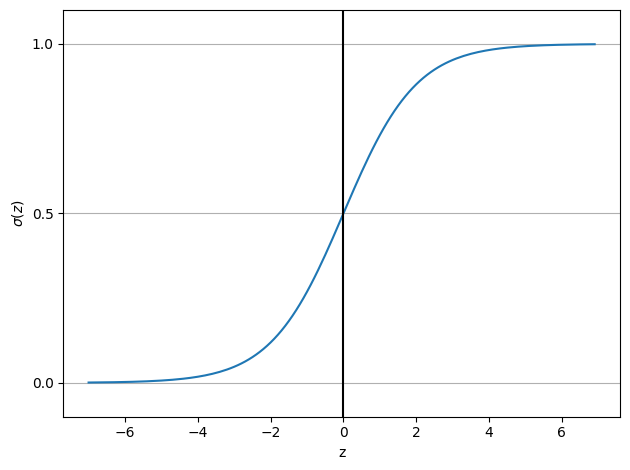

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()


The main difference beetwen ADA and Logistic regression is the activation function now is the sigmoide function

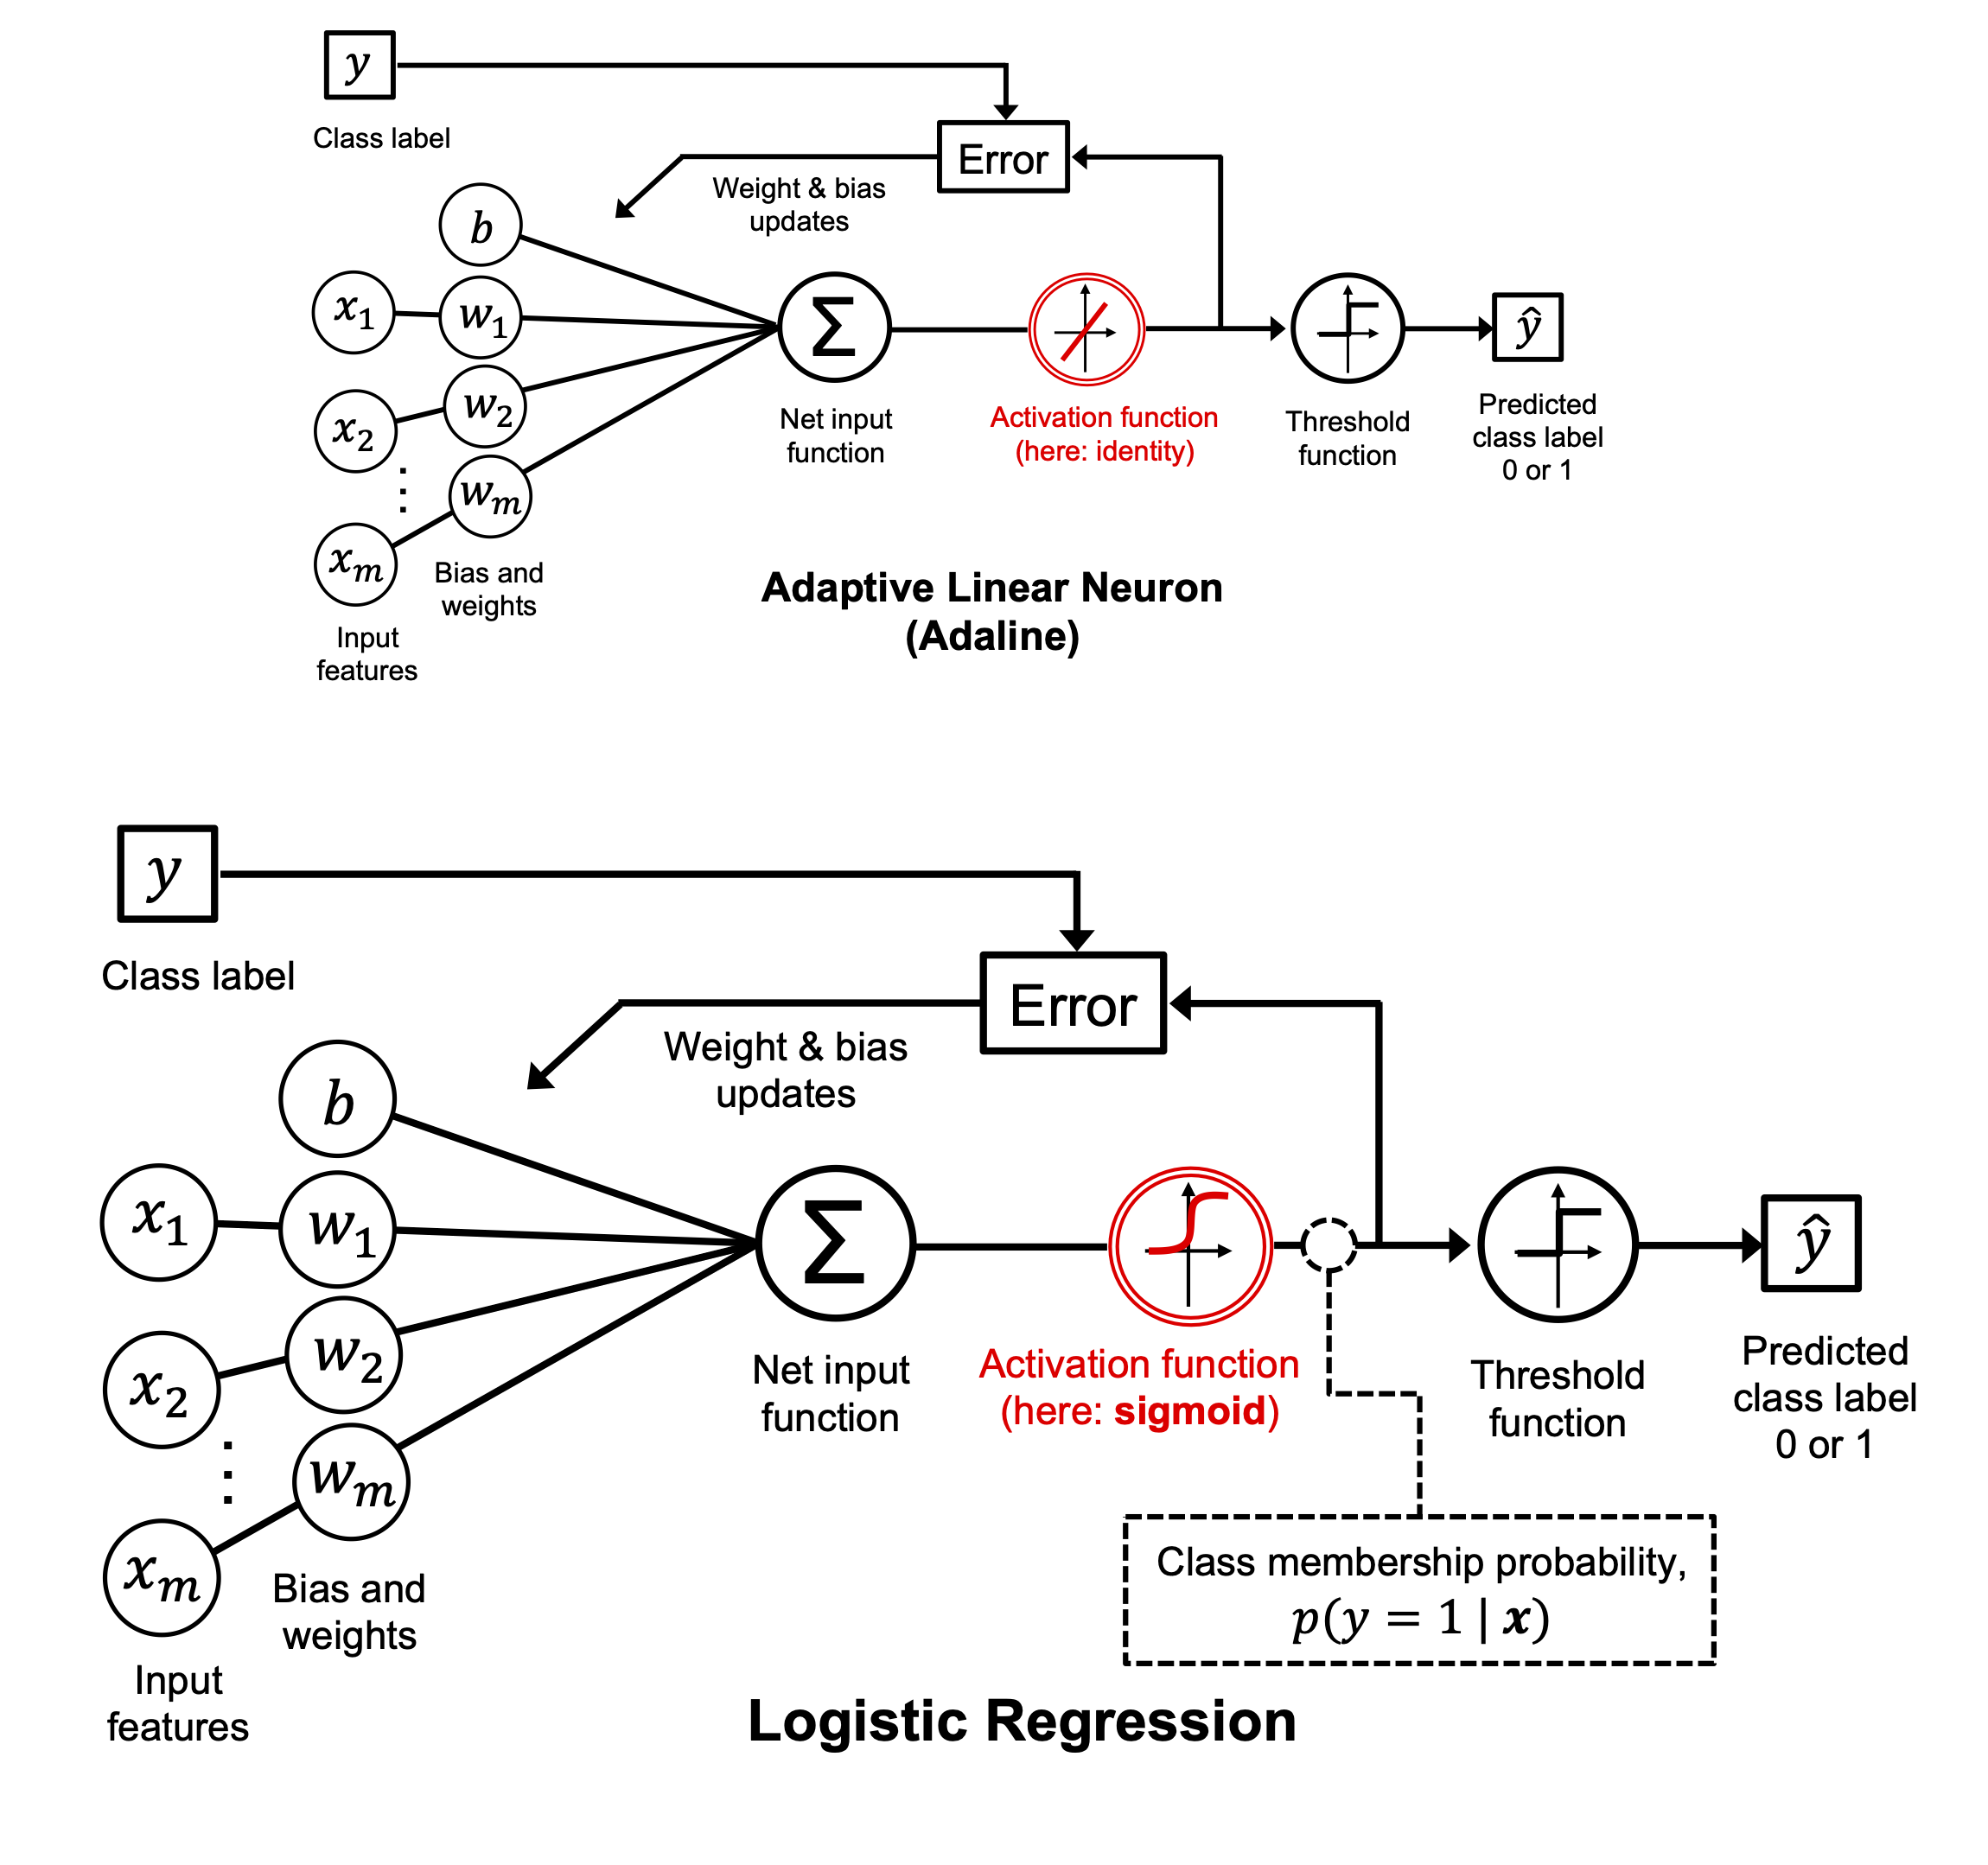

In [ ]:
from IPython.display import Image
Image(filename='./03_03.png', width=500)

So $\sigma(z)$ is the probability of $x$ belongs to the class $y=1$. If $\sigma(z)=0.8$ means the probability of $x$ to belongs to class $1$ is $80 \%$.
Then the predicted probability can be written as:
$\bar{y}=
\begin{cases}
1 & \text{if} \ \sigma(z) \geq 0.5 \\
0 & \text{if} \ \text{otherwise}
\end{cases}
$

**Binary cross entropy**:

The random variable that is the label class $Y$ is a Bernulliana: $Y ≃ Ber(σ(z))$ because rapresents the succes of a trial. Now suppose the sample points are drawn i.i.d then the Likelihood function can be written as:
$$L(\cdot | w) = P(y|x, w) = \prod_{i=1}^{n} P(y^i | x^i, w) = \prod_{i=1}^{n} \left( \sigma(w^T x^i) \right)^{y^i} \left( 1 - \sigma(w^T x^i) \right)^{1 - y^i}$$

Take a log-likelihood:

$$log(L(\cdot | w)) = \sum_{i=1}^{n}[y^{i}\log(\sigma(z^{i}))+(1-y^i)\log((1-\sigma(z^{i})))]$$
Now the goal is maximize this function respect $w$ or minimize the negative log likelihood that is the Binary cross entropy:
$$BCE(w|\mathcal{D})=-\sum_{i=1}^{n}[y^{i}\log(\sigma(z^{i}))+(1-y^i)\log((1-\sigma(z^{i})))]$$.

If we consider a single training example:

$$BCE(w,y^i,x^i)=-y^{i}\log(\sigma(w^{T}x^{i}))-(1-y^i)\log((1-\sigma(w^Tx^{i})))$$.

Then we obtain:
$BCE(w)=
\begin{cases}
-\log(\sigma(z^i)) & \text{if} \ y^i=1 \\
-\log(1-\sigma(z^i)) & \text{if} \ y^i=0
\end{cases}
$





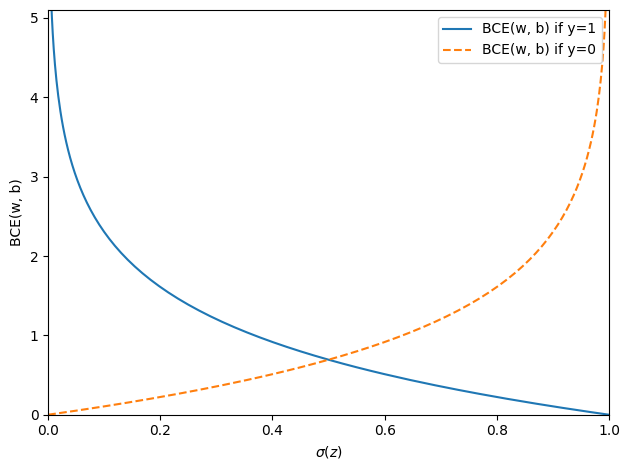

In [ ]:
def loss_1(z):
    return - np.log(sigmoid(z))


def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='BCE(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='BCE(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('BCE(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

<ipython-input-6-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


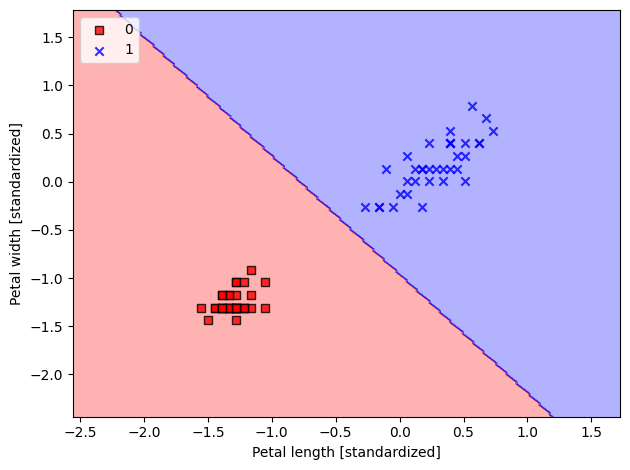

In [ ]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)





X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=100, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

In [ ]:
class LogisticRegressionSGD(object):
    """Logistic regression with sgd.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Cross entropy function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta *  xi * (error)
        self.b_ += self.eta *  error
        loss = -target*(np.log(output)) - ((1 - target)*(np.log(1 - output)))
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute linear activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, -1)

<ipython-input-6-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


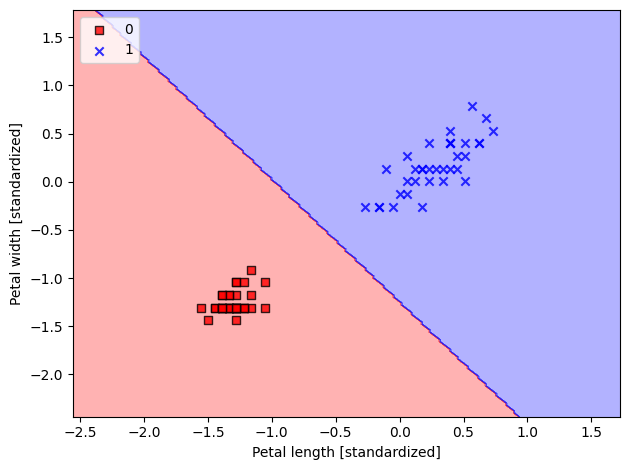

In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgds = LogisticRegressionSGD(eta=0.3, n_iter=100, random_state=1)
lrgds.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

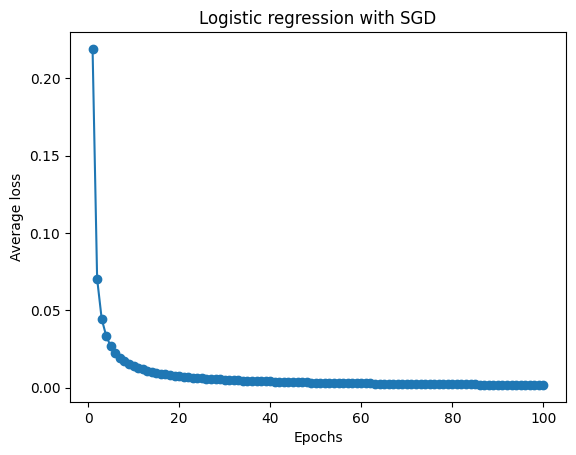

In [ ]:
plt.plot(range(1, len(lrgds.losses_) + 1), lrgds.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.title('Logistic regression with SGD')

#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

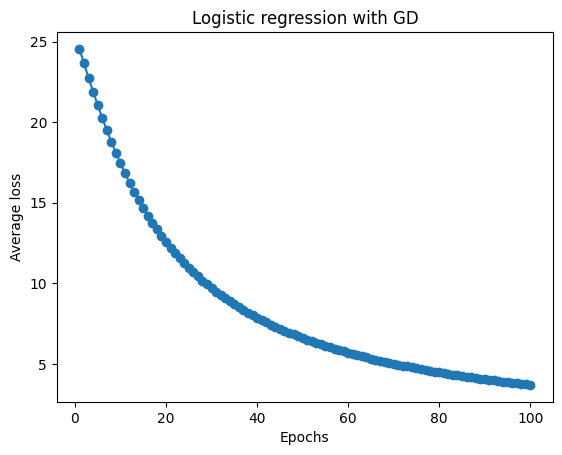

In [ ]:
plt.plot(range(1, len(lrgd.losses_) + 1), lrgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.title('Logistic regression with GD')
#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

How derive update weights?
First of all note that fixed an output value $z^{(i)}=w^{T}x^{(i)}$:
$$\frac{\delta\sigma}{\delta w_j}(z)=\frac{\delta \sigma}{\delta z} \cdot x_{j}$$.

Now $\frac{\delta \sigma}{\delta z}=\big(\frac{1}{1+e^{-z}}\big)'=\frac{e^{-z}}{(1+e^{-z})^2}=\frac{e^{-z}}{1+e^{-z}} \cdot \frac{1}{1+e^{-z}}=(1-\sigma(z))\sigma(z)$

So if we remember the training rule:
$$w_j:=w_j+dw_j$$ where $dw_j=-\eta\frac{\delta L}{\delta w_j}(⋅)$ and assume as loss function the *BCE($\cdot$)* we'll have:
$$w_j:=w_j-\eta\frac{\delta L}{\delta w_j}=w_j+\eta\sum_{i=1}^{n}(y^{i}-\sigma(z^{i}))x_j$$

##SCIKIT-LEARN LOGISTIC REGRESSION##

We take the first three samples and predict the probabilities to belong at different classes. We obtain an array $3 \times 3$ where the row is a probability vector
$p_j=[P(y=0|X_j),P(y=1|X_j),P(y=2|X_j)]$. Now

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


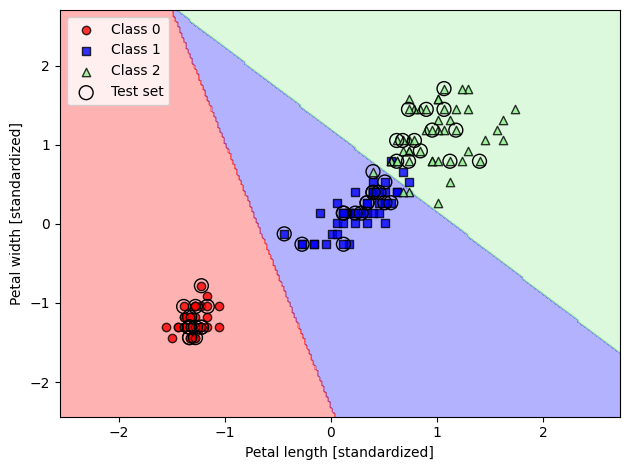

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [ ]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()




lr.predict_proba(X_test_std[:3, :])










In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

###Multinomal Logistic Regression###


Imagine now if we're working with a multiclassification problem, for example we want perform a task of sentiment classification with three labels \{positive,negative,neutral\}. In this case the label class is multivariate Bernulliana $Y=(Y_1,Y_2,Y_3)$ and the distribution of probability is:
$$P(Y=y)=P(Y_1=y_1,Y_2=y_2,Y_3=y_3)$$.

Now the marginal probability of $P(Y_i=y_i)=∑_{y_1,y_2\dots y_{i-1},y_{i+1}\dots y_k}P(Y_1=y_1,Y_2=y_2\dots Y_{i-1}=y_{i-1},Y_i=y_i,Y_{i+1}=y_{i+1}\dots Y_k=y_k)$
using the chain rule probability:
$P(Y_i=y_i)=∑P(Y_i=y_i|Y_1…Yk)∏_{j=1}^{k}P(Y_j|\cap_{s=1}^{j-1}Y_s)$
Now suppose the three class labels are indipendent bernullian, so it's related to the problem of hard classification: a sample points can be belongs only an unique class.


In this case the density function(probability mass function in discrete case) is:
$p(Y)=∏_{i=1}^{k}p(Y_i)=\prod_{i=1}^{k}p_i^{y_i}(1-p_i)^{1-y_i}$
that means the mass probability function of $Ber_{≃Y}(p_1…p_k)$
Now we consider the approach to train k classifiers and obtain:
$P(Y_i=1|x)=\sigma(w_{i}^{T} x) \ \ i=1 \dots k$
this is known as ONEvsALL.

Another approach is tu use the softmax approach. Considering the logit function:
$logit(P(y=j|x))=w_{j} \cdot x$

Now $ln(P(y=j))=w_jx-ln(Z)$ where the last term is a regulation term. Now we obtain $P(y=j)=\frac{1}{Z}e^{z_j}$ and the regulation term is:
$1=\sum_{k=1 \dots K}(P(y=k))=\frac{1}{Z}\sum_ke^{z_k} \implies Z=∑_ke^{z_k}$.

Finally the probability $P(Y=j)=\frac{e^{z_j}}{\sum_{i=1 \dots k}e^{z_i}}$.

Its important now consider the loss function for multiclassification problem. Take the negative log-likelihood:
$$-log(L(w|y,x))=-\log\big(∏_{i=1}^{n}P(Y_i|x,w)\big)= \\\
-\log\big(∏_{i=1}^{n}∏_{j=1}^{K}p_{ij}^{y_{ij}}(1-p_{ij})^{1-y_{ij}}\big)= \\\\
-\sum_{i}\sum_{j} y_{ij}\log(softmax(w_jx_{i}))+(1-y_{ij})\log((1-softmax(w_jx_i))$$

$L(\cdot)=∏_{i=1}^{n}P(Y_i \in C)=∏_{i}∏_jP(Y_i=c_j)^{1_{y_i=c_j}}$


###Regularitazion and handling overfitting###